In [1]:
import pandas as pd
import functools
from math import pi
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_Rows', 13000)
pd.set_option('display.max_columns', 12000)

# **All_Data**

In [2]:
row_data = pd.read_csv('BCP_WEEK_5.csv')

In [3]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255886 entries, 0 to 255885
Data columns (total 7 columns):
UUID              255886 non-null object
CLIENT            255886 non-null object
NEW_RECURRING     255886 non-null object
SNAPSHOT_DATE     255886 non-null object
DPD               254502 non-null float64
BUCKET_GROUPED    255886 non-null object
EMPLOYMNT_TYPE    245070 non-null object
dtypes: float64(1), object(6)
memory usage: 13.7+ MB


In [4]:
row_data.head()

,UUID,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
0,DLS377605R11,MONEDONOW_ES,NEW,2020-05-17,3.0,1-29,NaN
1,DLS37912R11,MONEDONOW_ES,NEW,2020-05-11,-31.0,Performing,NaN
2,DLS37912R11,MONEDONOW_ES,NEW,2020-05-17,-25.0,Performing,NaN
3,DLS38224R11,MONEDONOW_ES,NEW,2020-05-11,154.0,150-179,NaN
4,DLS38224R11,MONEDONOW_ES,NEW,2020-05-17,160.0,150-179,NaN


In [5]:
row_data.isnull().sum()

UUID                  0
CLIENT                0
NEW_RECURRING         0
SNAPSHOT_DATE         0
DPD                1384
BUCKET_GROUPED        0
EMPLOYMNT_TYPE    10816
dtype: int64

In [6]:
row_data['EMPLOYMNT_TYPE'].fillna(value="Blank", inplace= True)

In [7]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255886 entries, 0 to 255885
Data columns (total 7 columns):
UUID              255886 non-null object
CLIENT            255886 non-null object
NEW_RECURRING     255886 non-null object
SNAPSHOT_DATE     255886 non-null object
DPD               254502 non-null float64
BUCKET_GROUPED    255886 non-null object
EMPLOYMNT_TYPE    255886 non-null object
dtypes: float64(1), object(6)
memory usage: 13.7+ MB


In [8]:
row_data['CLIENT'].value_counts(dropna=False)

MONEDO_FINANCE_PL    107963
ZAIMO                 64573
MONEDONOW_PL          47191
MONEDONOW_ES          29286
KREDITO_24_ES          6873
Name: CLIENT, dtype: int64

# All_Product_Beg_of_week

In [9]:
Beg_of_week= row_data['SNAPSHOT_DATE'].min()

In [10]:
Beg_of_week

'2020-05-11'

In [11]:
Beg_period= row_data[row_data.SNAPSHOT_DATE == Beg_of_week]

In [12]:
Beg_performing= Beg_period[Beg_period.BUCKET_GROUPED == "Performing"]

In [13]:
Beg_performing.head()

,UUID,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
1,DLS37912R11,MONEDONOW_ES,NEW,2020-05-11,-31.0,Performing,Blank
5,DLS382914R11,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
7,DLS384169R11,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
9,DLS384581R11,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
11,DLS384860R11,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank


In [14]:
Beg_performing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92846 entries, 1 to 255884
Data columns (total 7 columns):
UUID              92846 non-null object
CLIENT            92846 non-null object
NEW_RECURRING     92846 non-null object
SNAPSHOT_DATE     92846 non-null object
DPD               92846 non-null float64
BUCKET_GROUPED    92846 non-null object
EMPLOYMNT_TYPE    92846 non-null object
dtypes: float64(1), object(6)
memory usage: 5.7+ MB


In [15]:
Data_Beg_performing = Beg_performing.groupby("CLIENT", as_index=False).agg({"UUID": "count"}) 

In [16]:
Data_Beg_performing

,CLIENT,UUID
0,KREDITO_24_ES,795
1,MONEDONOW_ES,9490
2,MONEDONOW_PL,19443
3,MONEDO_FINANCE_PL,51405
4,ZAIMO,11713


# All_Product_End_of_week

In [17]:
End_of_week = row_data['SNAPSHOT_DATE'].max()

In [18]:
End_period = row_data[row_data.SNAPSHOT_DATE == End_of_week]

In [19]:
End_period.head()

,UUID,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
0,DLS377605R11,MONEDONOW_ES,NEW,2020-05-17,3.0,1-29,Blank
2,DLS37912R11,MONEDONOW_ES,NEW,2020-05-17,-25.0,Performing,Blank
4,DLS38224R11,MONEDONOW_ES,NEW,2020-05-17,160.0,150-179,Blank
6,DLS382914R11,MONEDONOW_ES,NEW,2020-05-17,-1.0,Performing,Blank
8,DLS384169R11,MONEDONOW_ES,NEW,2020-05-17,-1.0,Performing,Blank


In [20]:
End_period_renamed = End_period.rename(columns = {"SNAPSHOT_DATE": "SNAPSHOT_DATE_end","BUCKET_GROUPED": "BUCKET_GROUPED_end"}) 

In [21]:
End_period_renamed.head()

,UUID,CLIENT,NEW_RECURRING,SNAPSHOT_DATE_end,DPD,BUCKET_GROUPED_end,EMPLOYMNT_TYPE
0,DLS377605R11,MONEDONOW_ES,NEW,2020-05-17,3.0,1-29,Blank
2,DLS37912R11,MONEDONOW_ES,NEW,2020-05-17,-25.0,Performing,Blank
4,DLS38224R11,MONEDONOW_ES,NEW,2020-05-17,160.0,150-179,Blank
6,DLS382914R11,MONEDONOW_ES,NEW,2020-05-17,-1.0,Performing,Blank
8,DLS384169R11,MONEDONOW_ES,NEW,2020-05-17,-1.0,Performing,Blank


In [22]:
End_period_cleaned=End_period_renamed.loc[:,['UUID','SNAPSHOT_DATE_end','BUCKET_GROUPED_end']]

In [23]:
End_period_cleaned.head()

,UUID,SNAPSHOT_DATE_end,BUCKET_GROUPED_end
0,DLS377605R11,2020-05-17,1-29
2,DLS37912R11,2020-05-17,Performing
4,DLS38224R11,2020-05-17,150-179
6,DLS382914R11,2020-05-17,Performing
8,DLS384169R11,2020-05-17,Performing


In [24]:
Data_end_check = End_period_renamed.groupby("CLIENT", as_index=False).agg({"UUID": "count"}) 
Data_end_check

,CLIENT,UUID
0,KREDITO_24_ES,3434
1,MONEDONOW_ES,14649
2,MONEDONOW_PL,23671
3,MONEDO_FINANCE_PL,53765
4,ZAIMO,32188


## Selecting only performing customer at Beg of the period

In [25]:
Compiled_data= pd.merge(End_period_cleaned,Beg_performing, how='right', on='UUID')


In [26]:
Compiled_data.head()

,UUID,SNAPSHOT_DATE_end,BUCKET_GROUPED_end,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
0,DLS37912R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-31.0,Performing,Blank
1,DLS382914R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
2,DLS384169R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
3,DLS384581R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
4,DLS384860R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank


In [27]:
Compiled_data_check = Compiled_data.groupby("CLIENT", as_index=False).agg({"UUID": "count"}) 
Compiled_data_check

,CLIENT,UUID
0,KREDITO_24_ES,795
1,MONEDONOW_ES,9490
2,MONEDONOW_PL,19443
3,MONEDO_FINANCE_PL,51405
4,ZAIMO,11713


In [28]:
Table_outPut= Compiled_data#.drop(columns=['Emp_New','DPD'])

In [29]:
#Table_outPut.info()

In [30]:
"""
EMPLOYED_TEMPORARY	Self-Employee
EMPLOYED_INFINITE	Employee
STUDENT	STUDENT
SELF_EMPLOYED	Self-Employee
MATERNITY_LEAVE	Other
STATE_EMPLOYEE_INFINITE	Employee
UNEMPLOYED	UNEMPLOYED
PENSIONER	PENSIONER
STATE_EMPLOYEE_TEMPORARY	Self-Employee
RETIRED	Other
EMPLOYEE_FULL_TIME	Employee
EMPLOYEE_PART_TIME	Employee
OWNER	Other
STATE_EMPLOYEE	Employee
EMPLOYEE	Employee
RETIREE	Other
SELFEMPLOYED	Self-Employee
"""

#  why we not use retired as pension ? 

'\nEMPLOYED_TEMPORARY\tSelf-Employee\nEMPLOYED_INFINITE\tEmployee\nSTUDENT\tSTUDENT\nSELF_EMPLOYED\tSelf-Employee\nMATERNITY_LEAVE\tOther\nSTATE_EMPLOYEE_INFINITE\tEmployee\nUNEMPLOYED\tUNEMPLOYED\nPENSIONER\tPENSIONER\nSTATE_EMPLOYEE_TEMPORARY\tSelf-Employee\nRETIRED\tOther\nEMPLOYEE_FULL_TIME\tEmployee\nEMPLOYEE_PART_TIME\tEmployee\nOWNER\tOther\nSTATE_EMPLOYEE\tEmployee\nEMPLOYEE\tEmployee\nRETIREE\tOther\nSELFEMPLOYED\tSelf-Employee\n'

In [31]:
Table_outPut.replace(to_replace=['EMPLOYED_TEMPORARY', 'EMPLOYED_INFINITE', 'SELF_EMPLOYED','MATERNITY_LEAVE','STATE_EMPLOYEE_INFINITE','STATE_EMPLOYEE_TEMPORARY','RETIRED','EMPLOYEE_FULL_TIME','EMPLOYEE_PART_TIME','OWNER','STATE_EMPLOYEE','EMPLOYEE','RETIREE','SELFEMPLOYED'],
                       value= ['Self-Employee', 'Employee', 'Self-Employee','Other','Employee','Self-Employee','Other','Employee','Employee','Other','Employee','Employee','Other','Self-Employee'], 
                                            inplace=True)

In [32]:
Table_outPut.head()

,UUID,SNAPSHOT_DATE_end,BUCKET_GROUPED_end,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
0,DLS37912R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-31.0,Performing,Blank
1,DLS382914R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
2,DLS384169R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
3,DLS384581R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank
4,DLS384860R11,2020-05-17,Performing,MONEDONOW_ES,NEW,2020-05-11,-7.0,Performing,Blank


In [33]:
Table_outPut.isnull().sum()

UUID                     0
SNAPSHOT_DATE_end     2479
BUCKET_GROUPED_end    2479
CLIENT                   0
NEW_RECURRING            0
SNAPSHOT_DATE            0
DPD                      0
BUCKET_GROUPED           0
EMPLOYMNT_TYPE           0
dtype: int64

In [34]:
check_data_problem = pd.isnull(Table_outPut["BUCKET_GROUPED_end"])  
    
# filtering data  
# displaying data only with Gender = NaN  
#Table_outPut[check_data_problem]  

In [35]:
Table_outPut['BUCKET_GROUPED_end'].fillna(value="Closed", inplace= True)

In [36]:
Table_outPut['BUCKET_GROUPED_end'].value_counts(dropna=False)

Performing    86779
1-29           3315
Closed         2681
Extra            39
30-59            27
60-89             5
Name: BUCKET_GROUPED_end, dtype: int64

In [37]:
test = Table_outPut.groupby("CLIENT", as_index=False).agg({"UUID": "count"})
test

,CLIENT,UUID
0,KREDITO_24_ES,795
1,MONEDONOW_ES,9490
2,MONEDONOW_PL,19443
3,MONEDO_FINANCE_PL,51405
4,ZAIMO,11713


In [38]:
employment_sector_products= pd.pivot_table(Table_outPut, values=['UUID'], index=['CLIENT'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=True ,aggfunc="count")#aggfunc=lambda UUID: len(UUID.unique()))

In [39]:
employment_sector_products

UUID                                           
BUCKET_GROUPED_end  1-29 30-59 60-89 Closed Extra Performing    All
CLIENT                                                             
KREDITO_24_ES         82     0     0     78     1        634    795
MONEDONOW_ES         270    26     5     31    30       9128   9490
MONEDONOW_PL         921     0     0    146     1      18375  19443
MONEDO_FINANCE_PL   1063     0     0   1011     0      49331  51405
ZAIMO                979     1     0   1415     7       9311  11713
All                 3315    27     5   2681    39      86779  92846

(6.0, 0.0)

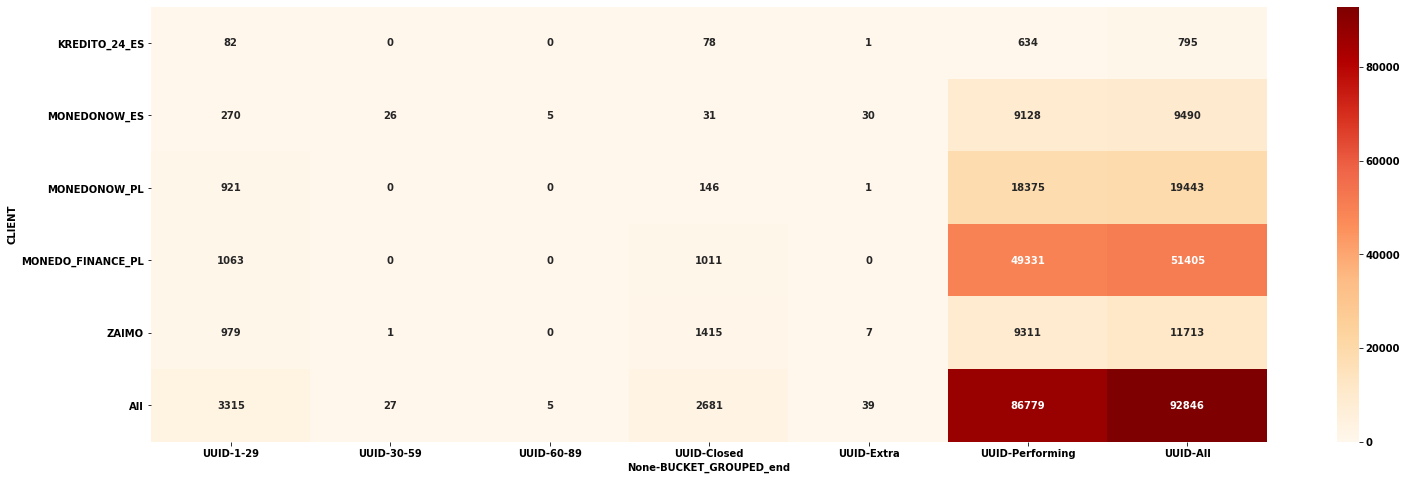

In [40]:
f, ax = plt.subplots(figsize=(25, 8))
ax= sns.heatmap(employment_sector_products, annot=True, fmt="d",cmap="OrRd")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [41]:
employment_sector_products.columns = employment_sector_products.columns.droplevel(0)

In [42]:
employment_sector_products

BUCKET_GROUPED_end,1-29,30-59,60-89,Closed,Extra,Performing,All
CLIENT,,,,,,,
KREDITO_24_ES,82,0,0,78,1,634,795
MONEDONOW_ES,270,26,5,31,30,9128,9490
MONEDONOW_PL,921,0,0,146,1,18375,19443
MONEDO_FINANCE_PL,1063,0,0,1011,0,49331,51405
ZAIMO,979,1,0,1415,7,9311,11713
All,3315,27,5,2681,39,86779,92846


# Russian analysis

In [43]:
ZAIMO = Table_outPut.loc[Table_outPut['CLIENT']== "ZAIMO"]
ZAIMO.head()

,UUID,SNAPSHOT_DATE_end,BUCKET_GROUPED_end,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
782,MLR1289345R11,2020-05-17,1-29,ZAIMO,RECURRING,2020-05-11,-3.0,Performing,Employee
783,MLR1289400R11,2020-05-17,Performing,ZAIMO,RECURRING,2020-05-11,-17.0,Performing,Self-Employee
784,MLR1289566R11,2020-05-17,Performing,ZAIMO,RECURRING,2020-05-11,-16.0,Performing,Employee
785,MLR1289877R11,2020-05-17,Performing,ZAIMO,RECURRING,2020-05-11,-4.0,Performing,Employee
786,MLR1290336R11,2020-05-17,Performing,ZAIMO,RECURRING,2020-05-11,-11.0,Performing,Self-Employee


In [44]:
ZAIMO_analysis= pd.pivot_table(ZAIMO, values=['UUID'], index=['EMPLOYMNT_TYPE'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#aggfunc=lambda UUID: len(UUID.unique()))

In [45]:
ZAIMO_analysis.columns = ZAIMO_analysis.columns.droplevel(0)

# Export

In [46]:
ZAIMO_analysis['Total'] = ZAIMO_analysis.sum(axis=1)
ZAIMO_PRECENTAGE= ZAIMO_analysis.div(ZAIMO_analysis['Total'], axis=0)
ZAIMO_PRECENTAGE

BUCKET_GROUPED_end,1-29,30-59,Closed,Extra,Performing,Total
EMPLOYMNT_TYPE,,,,,,
Blank,0.208333,0.000000,0.208333,0.000000,0.583333,1.0
Employee,0.082205,0.000000,0.117087,0.000610,0.800098,1.0
Other,0.053435,0.000000,0.183206,0.000000,0.763359,1.0
PENSIONER,0.040724,0.000000,0.113122,0.000000,0.846154,1.0
STUDENT,0.092879,0.000000,0.139319,0.000000,0.767802,1.0
Self-Employee,0.086922,0.000392,0.130384,0.000392,0.781911,1.0
UNEMPLOYED,0.122605,0.000000,0.088123,0.003831,0.785441,1.0


f, ax = plt.subplots(figsize=(25, 8))
ax= sns.heatmap(ZAIMO_analysis, annot=True, fmt="d",cmap="OrRd")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [47]:
ZAIMO_N_R= pd.pivot_table(ZAIMO, values=['UUID'], index=['NEW_RECURRING'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#aggfunc=lambda UUID: len(UUID.unique()))

In [48]:
ZAIMO_N_R.columns = ZAIMO_N_R.columns.droplevel(0)


In [49]:
ZAIMO_N_R

BUCKET_GROUPED_end,1-29,30-59,Closed,Extra,Performing
NEW_RECURRING,,,,,
NEW,141,0,218,1,1535
RECURRING,838,1,1197,6,7776


# Export

In [50]:
ZAIMO_N_R['Total'] = ZAIMO_N_R.sum(axis=1)
ZAIMO_N_R_PRECENTAGE= ZAIMO_N_R.div(ZAIMO_N_R['Total'], axis=0)
ZAIMO_N_R_PRECENTAGE

BUCKET_GROUPED_end,1-29,30-59,Closed,Extra,Performing,Total
NEW_RECURRING,,,,,,
NEW,0.074406,0.000000,0.115040,0.000528,0.810026,1.0
RECURRING,0.085353,0.000102,0.121919,0.000611,0.792015,1.0


# Poland Analysis

In [51]:
MONEDO_FINANCE_PL = Table_outPut.loc[Table_outPut['CLIENT']== "MONEDO_FINANCE_PL"]
MONEDO_FINANCE_PL.head()

,UUID,SNAPSHOT_DATE_end,BUCKET_GROUPED_end,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
39,PLP1531497R11,2020-05-17,Performing,MONEDO_FINANCE_PL,RECURRING,2020-05-11,-21.0,Performing,Employee
40,PLP1532655R11,2020-05-17,Performing,MONEDO_FINANCE_PL,RECURRING,2020-05-11,-21.0,Performing,Employee
41,PLP1537807R11,2020-05-17,Performing,MONEDO_FINANCE_PL,NEW,2020-05-11,-22.0,Performing,Other
42,PLP1538419R11,2020-05-17,Performing,MONEDO_FINANCE_PL,NEW,2020-05-11,-22.0,Performing,Employee
43,PLP1541439R11,2020-05-17,Performing,MONEDO_FINANCE_PL,NEW,2020-05-11,-23.0,Performing,Employee


In [52]:
MONEDO_FINANCE_PL_A= pd.pivot_table(MONEDO_FINANCE_PL, values=['UUID'], index=['EMPLOYMNT_TYPE'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#aggfunc=lambda UUID: len(UUID.unique()))

In [53]:
MONEDO_FINANCE_PL_A.columns = MONEDO_FINANCE_PL_A.columns.droplevel(0)

## Export

In [54]:
MONEDO_FINANCE_PL_A['Total'] = MONEDO_FINANCE_PL_A.sum(axis=1)
MONEDO_FINANCE_PL_A_PRECENTAGE= MONEDO_FINANCE_PL_A.div(MONEDO_FINANCE_PL_A['Total'], axis=0)
MONEDO_FINANCE_PL_A_PRECENTAGE

BUCKET_GROUPED_end,1-29,Closed,Performing,Total
EMPLOYMNT_TYPE,,,,
Blank,0.011105,0.026097,0.962798,1.0
Employee,0.019789,0.019184,0.961027,1.0
Other,0.017936,0.012217,0.969847,1.0
PENSIONER,0.020484,0.054004,0.925512,1.0
STUDENT,0.020505,0.015773,0.963722,1.0
Self-Employee,0.037755,0.025601,0.936643,1.0
UNEMPLOYED,0.018018,0.017017,0.964965,1.0


In [55]:
MONEDO_FINANCE_PL.head()

,UUID,SNAPSHOT_DATE_end,BUCKET_GROUPED_end,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
39,PLP1531497R11,2020-05-17,Performing,MONEDO_FINANCE_PL,RECURRING,2020-05-11,-21.0,Performing,Employee
40,PLP1532655R11,2020-05-17,Performing,MONEDO_FINANCE_PL,RECURRING,2020-05-11,-21.0,Performing,Employee
41,PLP1537807R11,2020-05-17,Performing,MONEDO_FINANCE_PL,NEW,2020-05-11,-22.0,Performing,Other
42,PLP1538419R11,2020-05-17,Performing,MONEDO_FINANCE_PL,NEW,2020-05-11,-22.0,Performing,Employee
43,PLP1541439R11,2020-05-17,Performing,MONEDO_FINANCE_PL,NEW,2020-05-11,-23.0,Performing,Employee


In [56]:
MONEDO_FINANCE_PL_N_R= pd.pivot_table(MONEDO_FINANCE_PL, values=['UUID'], index=['NEW_RECURRING'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")
MONEDO_FINANCE_PL_N_R.columns = MONEDO_FINANCE_PL_N_R.columns.droplevel(0)
MONEDO_FINANCE_PL_N_R['Total'] = MONEDO_FINANCE_PL_N_R.sum(axis=1)
MONEDO_FINANCE_PL_N_R_PRECENTAGE= MONEDO_FINANCE_PL_N_R.div(MONEDO_FINANCE_PL_N_R['Total'], axis=0)
MONEDO_FINANCE_PL_N_R_PRECENTAGE

BUCKET_GROUPED_end,1-29,Closed,Performing,Total
NEW_RECURRING,,,,
NEW,0.018049,0.017392,0.964558,1.0
RECURRING,0.025004,0.023409,0.951587,1.0


## Export

In [57]:
MONEDONOW_PL = Table_outPut.loc[Table_outPut['CLIENT']== "MONEDONOW_PL"]
MONEDONOW_PL= pd.pivot_table(MONEDONOW_PL, values=['UUID'], index=['EMPLOYMNT_TYPE'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#aggfunc=lambda UUID: len(UUID.unique()))
MONEDONOW_PL.columns = MONEDONOW_PL.columns.droplevel(0)
MONEDONOW_PL['Total'] = MONEDONOW_PL.sum(axis=1)
MONEDONOW_PL_PRECENTAGE= MONEDONOW_PL.div(MONEDONOW_PL['Total'], axis=0)
MONEDONOW_PL_PRECENTAGE

BUCKET_GROUPED_end,1-29,Closed,Extra,Performing,Total
EMPLOYMNT_TYPE,,,,,
Blank,0.037037,0.111111,0.018519,0.833333,1.0
Employee,0.048113,0.007397,0.000000,0.944490,1.0
Other,0.044413,0.002865,0.000000,0.952722,1.0
PENSIONER,0.028986,0.021739,0.000000,0.949275,1.0
STUDENT,0.044715,0.008130,0.000000,0.947154,1.0
Self-Employee,0.048964,0.013183,0.000000,0.937853,1.0
UNEMPLOYED,0.039726,0.000000,0.000000,0.960274,1.0


In [58]:
MONEDONOW_PL = Table_outPut.loc[Table_outPut['CLIENT']== "MONEDONOW_PL"]
MONEDONOW_PL.head()

,UUID,SNAPSHOT_DATE_end,BUCKET_GROUPED_end,CLIENT,NEW_RECURRING,SNAPSHOT_DATE,DPD,BUCKET_GROUPED,EMPLOYMNT_TYPE
1795,DLP2553260R11,2020-05-17,Performing,MONEDONOW_PL,NEW,2020-05-11,-11.0,Performing,Employee
1796,DLP2554376R11,2020-05-17,Performing,MONEDONOW_PL,NEW,2020-05-11,-11.0,Performing,Employee
1797,DLP2555550R11,2020-05-17,Performing,MONEDONOW_PL,RECURRING,2020-05-11,-11.0,Performing,Employee
1798,DLP2558472R11,2020-05-17,Performing,MONEDONOW_PL,NEW,2020-05-11,-14.0,Performing,Employee
1799,DLP2559790R11,2020-05-17,Performing,MONEDONOW_PL,NEW,2020-05-11,-14.0,Performing,Employee


In [59]:
MONEDONOW_PL_N_R= pd.pivot_table(MONEDONOW_PL, values=['UUID'], index=['NEW_RECURRING'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#ag
MONEDONOW_PL_N_R

UUID                        
BUCKET_GROUPED_end 1-29 Closed Extra Performing
NEW_RECURRING                                  
NEW                 295     35     0       8361
RECURRING           626    111     1      10014

In [60]:
MONEDONOW_PL_N_R.columns = MONEDONOW_PL_N_R.columns.droplevel(0)
MONEDONOW_PL_N_R['Total'] = MONEDONOW_PL_N_R.sum(axis=1)
MONEDONOW_PL_N_R_PRECENTAGE= MONEDONOW_PL_N_R.div(MONEDONOW_PL_N_R['Total'], axis=0)
MONEDONOW_PL_N_R_PRECENTAGE

BUCKET_GROUPED_end,1-29,Closed,Extra,Performing,Total
NEW_RECURRING,,,,,
NEW,0.033943,0.004027,0.000000,0.962030,1.0
RECURRING,0.058222,0.010324,0.000093,0.931362,1.0


# Espain 

In [61]:
KREDITO_24_ES = Table_outPut.loc[Table_outPut['CLIENT']== "KREDITO_24_ES"]
KREDITO_24_ES= pd.pivot_table(KREDITO_24_ES, values=['UUID'], index=['EMPLOYMNT_TYPE'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#aggfunc=lambda UUID: len(UUID.unique()))
KREDITO_24_ES['Total'] = KREDITO_24_ES.sum(axis=1)
KREDITO_24_ES_PRECENTAGE= KREDITO_24_ES.div(KREDITO_24_ES['Total'], axis=0)
KREDITO_24_ES_PRECENTAGE

UUID                                Total
BUCKET_GROUPED_end      1-29    Closed     Extra Performing      
EMPLOYMNT_TYPE                                                   
Blank               0.200000  0.000000  0.000000   0.800000   1.0
Employee            0.094303  0.092338  0.000000   0.813360   1.0
PENSIONER           0.132530  0.048193  0.000000   0.819277   1.0
STUDENT             0.166667  0.083333  0.000000   0.750000   1.0
Self-Employee       0.097015  0.134328  0.000000   0.768657   1.0
UNEMPLOYED          0.134615  0.153846  0.019231   0.692308   1.0

In [62]:
KREDITO_24_ES_N = Table_outPut.loc[Table_outPut['CLIENT']== "KREDITO_24_ES"]
KREDITO_24_ES_N_R= pd.pivot_table(KREDITO_24_ES_N, values=['UUID'], index=['NEW_RECURRING'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#ag
KREDITO_24_ES_N_R.columns = KREDITO_24_ES_N_R.columns.droplevel(0)
KREDITO_24_ES_N_R['Total'] = KREDITO_24_ES_N_R.sum(axis=1)
KREDITO_24_ES_N_R_PRECENTAGE= KREDITO_24_ES_N_R.div(KREDITO_24_ES_N_R['Total'], axis=0)
KREDITO_24_ES_N_R_PRECENTAGE

BUCKET_GROUPED_end,1-29,Closed,Extra,Performing,Total
NEW_RECURRING,,,,,
NEW,0.115385,0.100000,0.003846,0.780769,1.0
RECURRING,0.097196,0.097196,0.000000,0.805607,1.0


In [63]:
MONEDONOW_ES = Table_outPut.loc[Table_outPut['CLIENT']== "MONEDONOW_ES"]
MONEDONOW_ES= pd.pivot_table(MONEDONOW_ES, values=['UUID'], index=['EMPLOYMNT_TYPE'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#aggfunc=lambda UUID: len(UUID.unique()))
MONEDONOW_ES.columns = MONEDONOW_ES.columns.droplevel(0)
MONEDONOW_ES['Total'] = MONEDONOW_ES.sum(axis=1)
MONEDONOW_ES_PRECENTAGE= MONEDONOW_ES.div(MONEDONOW_ES['Total'], axis=0)
MONEDONOW_ES_PRECENTAGE

BUCKET_GROUPED_end,1-29,30-59,60-89,Closed,Extra,Performing,Total
EMPLOYMNT_TYPE,,,,,,,
Blank,0.035326,0.007473,0.001359,0.003397,0.004755,0.947690,1.0
Employee,0.027280,0.002098,0.000484,0.002906,0.003067,0.964165,1.0
PENSIONER,0.021818,0.001212,0.000000,0.002424,0.002424,0.972121,1.0
STUDENT,0.037736,0.000000,0.000000,0.018868,0.000000,0.943396,1.0
Self-Employee,0.028614,0.001506,0.000000,0.004518,0.001506,0.963855,1.0
UNEMPLOYED,0.035587,0.000000,0.000000,0.007117,0.003559,0.953737,1.0


In [64]:
MONEDONOW_ES_N = Table_outPut.loc[Table_outPut['CLIENT']== "MONEDONOW_ES"]
MONEDONOW_ES_N_R= pd.pivot_table(MONEDONOW_ES_N, values=['UUID'], index=['NEW_RECURRING'],columns=['BUCKET_GROUPED_end'],fill_value=0,margins=False ,aggfunc="count")#ag
MONEDONOW_ES_N_R.columns = MONEDONOW_ES_N_R.columns.droplevel(0)
MONEDONOW_ES_N_R['Total'] = MONEDONOW_ES_N_R.sum(axis=1)
MONEDONOW_ES_N_R_PRECENTAGE= MONEDONOW_ES_N_R.div(MONEDONOW_ES_N_R['Total'], axis=0)
MONEDONOW_ES_N_R_PRECENTAGE

BUCKET_GROUPED_end,1-29,30-59,60-89,Closed,Extra,Performing,Total
NEW_RECURRING,,,,,,,
NEW,0.028232,0.002703,0.000451,0.003003,0.003154,0.962457,1.0
RECURRING,0.028965,0.002826,0.000706,0.003886,0.003179,0.960438,1.0
